In [1]:
!pip install pandasql

In [5]:
import pandasql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_bike = pd.read_csv('http://bit.ly/dwp-data-bike')
data_sales = pd.read_csv('http://bit.ly/dwp-data-ecommerce')
data_movies = pd.read_csv('http://bit.ly/dwp-data-movies-sample')
data_ratings = pd.read_csv('http://bit.ly/dwp-data-ratings-sample')

In [6]:
df_bike = data_bike
df_sales = data_sales
df_movies = data_movies
df_ratings = data_ratings

## Concat

In [21]:
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)


In [25]:
pd.concat([df_movies, df_movies])

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)


In [26]:
pd.concat([df_movies, df_movies], axis=1)

,movieId,title,movieId,title
0,1,Toy Story (1995),1,Toy Story (1995)
1,2,Jumanji (1995),2,Jumanji (1995)
2,3,Grumpier Old Men (1995),3,Grumpier Old Men (1995)


## Merging

merge()

In [13]:
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)


In [14]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,5,1,4.0,1996-11-08 06:36:02
3,6,2,4.0,1996-10-17 11:58:42
4,6,3,5.0,1996-10-17 12:11:36
5,6,4,3.0,1996-10-17 12:12:29
6,7,1,4.5,2005-01-25 06:52:26
7,8,2,4.0,1996-08-08 00:23:26
8,14,4,3.0,1996-06-22 11:07:33
9,15,1,2.5,2017-11-13 12:59:30


#### 1.Inner Join

In [12]:
pd.merge(df_ratings, df_movies, left_on='movieId', right_on='movieId')

,userId,movieId,rating,timestamp,title
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995)
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995)
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995)
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995)
4,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995)
5,6,3,5.0,1996-10-17 12:11:36,Grumpier Old Men (1995)
6,6,2,4.0,1996-10-17 11:58:42,Jumanji (1995)
7,8,2,4.0,1996-08-08 00:23:26,Jumanji (1995)


#### 2. Left Join

In [19]:
pd.merge(df_ratings, df_movies, left_on='movieId', right_on='movieId', how='left')

,userId,movieId,rating,timestamp,title
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995)
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995)
2,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995)
3,6,2,4.0,1996-10-17 11:58:42,Jumanji (1995)
4,6,3,5.0,1996-10-17 12:11:36,Grumpier Old Men (1995)
5,6,4,3.0,1996-10-17 12:12:29,NaN
6,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995)
7,8,2,4.0,1996-08-08 00:23:26,Jumanji (1995)
8,14,4,3.0,1996-06-22 11:07:33,NaN
9,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995)


## SQL (Structured Query Language)

"Bahasa yang digunakan" untuk kita ngambil informasi dari sebuah database

manusia  -----  SQL  -----  database

SQL itu semacam standard di dunia yang digunakan manusia untuk berinteraksi dengan data di database

MySQL, PostgreSQL, SQL Server, SQLite

**SELECT**
- Digunakan untuk memilih nama kolom

**FROM**
- Digunakan untuk memilih nama tabel (dataframe)

**WHERE**
- Digunakan untuk melakukan filter pada data

**GROUP BY**
- Digunakan untuk melakukan aggregasi data

**ORDER BY**
- Digunakan untuk melakukan sorting data

**LIMIT**
- Digunakan untuk membatasi jumlah data yang keluar

In [ ]:
# Aggregasi data
#   - Nilai yang kita cari
#   - Nilai yang kita hitung
#   - Fungsi aggregasi

In [52]:
df_bike.groupby(['gender', 'usertype'], as_index=False)['bikeid'].count()

,gender,usertype,bikeid
0,0,Customer,2648
1,0,Subscriber,805
2,1,Customer,2376
3,1,Subscriber,29545
4,2,Customer,1125
5,2,Subscriber,9731


In [48]:
query = """
        SELECT
            gender AS jk,
            AVG(tripduration) AS total
        FROM
            df_bike
        GROUP BY
            gender
        """

result = pandasql.sqldf(query)

result

,jk,total
0,0,721.587605
1,1,448.440713
2,2,488.428703


In [41]:
query = """
        SELECT
            tripduration, usertype, bikeid
        FROM
            df_bike
        WHERE
            gender = 0
            AND tripduration > 200
        ORDER BY
            tripduration DESC
        LIMIT
            10
        """

result = pandasql.sqldf(query)

result

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender
0,261,2019-08-01 00:14:55.9900,2019-08-01 00:19:17.4780,JC Medical Center,Liberty Light Rail,26268,Subscriber,1980,1
1,525,2019-08-01 00:23:28.6170,2019-08-01 00:32:13.7000,Newport Pkwy,Hamilton Park,29279,Subscriber,1991,1
2,219,2019-08-01 00:32:36.1410,2019-08-01 00:36:15.2730,Warren St,City Hall,29598,Subscriber,1988,1
3,262,2019-08-01 00:41:26.6700,2019-08-01 00:45:49.3530,Grove St PATH,Jersey & 3rd,26162,Subscriber,1960,1
4,820,2019-08-01 00:43:15.2990,2019-08-01 00:56:55.5350,City Hall,Bergen Ave,29598,Subscriber,1981,1
...,...,...,...,...,...,...,...,...,...
38850,1543,2019-08-31 23:35:54.0660,2019-09-01 00:01:37.9420,Warren St,Essex Light Rail,29435,Customer,1977,1
38851,384,2019-08-31 23:40:45.2450,2019-08-31 23:47:09.8810,Harborside,Hamilton Park,29522,Subscriber,1988,1
38852,633,2019-08-31 23:45:55.6660,2019-08-31 23:56:29.5350,Grove St PATH,City Hall,29679,Customer,1997,1
38853,324,2019-08-31 23:50:27.9220,2019-08-31 23:55:52.8420,Marin Light Rail,Newark Ave,26198,Subscriber,1997,2


### Latihan

In [50]:
df_bike_filtered = df_bike[(df_bike['gender'] == 1) & (df_bike['tripduration'] > 300)]
df_bike_filtered.groupby('usertype', as_index=False)['tripduration'].mean()

,usertype,tripduration
0,Customer,846.236139
1,Subscriber,603.349115


In [60]:
# Menggunakan PandaSQL, cari rata-rata tripduration dari setiap usertype 
# yang memiliki tripduration lebih dari 300 dan memiliki gender 1

query = """
        SELECT
            usertype,
            gender,
            AVG(tripduration) AS average,
            COUNT(tripduration) AS total
        FROM
            df_bike
        WHERE
            tripduration > 300
        GROUP BY
            usertype,
            gender
        """

result = pandasql.sqldf(query)

result

,usertype,gender,average,total
0,Customer,0,894.354300,2337
1,Customer,1,846.236139,2020
2,Customer,2,922.714425,1026
3,Subscriber,0,619.109415,393
4,Subscriber,1,603.349115,16158
5,Subscriber,2,595.508715,5852


In [64]:
# Menggunakan PandaSQL, cari 5 rute dengan total tripduration paling banyak
# --> SUM LIMIT

query = """
        SELECT
            `start station name` AS start,
            `end station name` AS end,
            SUM(tripduration) AS total_duration
        FROM
            df_bike
        GROUP BY
            `start station name`,
            `end station name`
        ORDER BY
            total_duration DESC
        LIMIT
            5
        """

result = pandasql.sqldf(query)

result

,start,end,total_duration
0,Hamilton Park,Grove St PATH,328689
1,Grove St PATH,Hamilton Park,228289
2,Brunswick & 6th,Grove St PATH,192133
3,Grove St PATH,Marin Light Rail,181745
4,Marin Light Rail,Grove St PATH,159764


## Data Analysis Process

Menggunakan data sales e-commerce, cari insight yang bisa didapatkan dengan menjawab beberapa soal

In [69]:
df_sales.head()

,order_id,order_datetime,delivery_start_date,delivery_end_date,customer_name,customer_city,seller_name,seller_city,product_id,product_category,product_weight,product_cost,delivery_cost,payment_type,payment_installments,total_cost
0,23,2017-08-19 14:06:58,2017-08-29 00:00:00,2017-09-15 00:00:00,Judy Haley,gravatai,Lisa Hartung,maua,P_3,sports_leisure,600.0,29.90,14.10,ticket,1,44.00
1,45,2017-09-20 11:49:49,2017-09-22 00:00:00,2017-10-05 00:00:00,Jerry Amsterdam,sao paulo,Lisa Hartung,maua,P_9,sports_leisure,400.0,24.99,8.72,credit_card,1,33.71
2,47,2017-08-19 19:25:41,2017-08-31 00:00:00,2017-09-21 00:00:00,Wanda Amaral,salvador,Lisa Hartung,maua,P_11,sports_leisure,400.0,29.90,15.79,credit_card,2,45.69
3,228,2018-02-07 13:51:11,2018-02-19 00:00:00,2018-03-08 00:00:00,Lisa Cremer,sarandi,Preston Corsi,sao goncalo,P_19,health_beauty,390.0,119.90,15.59,ticket,1,135.49
4,229,2018-06-08 21:58:32,2018-06-18 00:00:00,2018-07-05 00:00:00,Derek Dominguez,campo largo,Preston Corsi,sao goncalo,P_19,health_beauty,390.0,119.50,15.72,credit_card,2,135.22


#### Question

1. Total produk terjual (quantity dan value) setiap bulan itu berapa pada setiap kategori? Coba kalian buat visualisasinya!
2. Jumlah transaksi di tiap jam dan tiap hari (monday, tuesday, wednesday, etc) itu ada berapa? Coba kalian buat visualisasinya!

#### Wrangle

In [75]:
# 1. Add "total cost" column, "product_cost" + "delivery_cost"
df_sales['total_cost'] = df_sales['product_cost'] + df_sales['delivery_cost']

# 2.Change "order_datetime" to datetime data type
df_sales['order_datetime'] = pd.to_datetime(df_sales['order_datetime'])

# 3. Add "order_month" column
df_sales['order_month'] = df_sales['order_datetime'].dt.strftime('%Y-%m')

# 4. Add "order_day" column
df_sales['order_day'] = df_sales['order_datetime'].dt.strftime('%A')

# 5. Change "order_day" column into categorical data type
df_sales['order_day'] = pd.Categorical(df_sales['order_day'],
                                       ordered=True,
                                       categories=['Monday',
                                                   'Tuesday',
                                                   'Wednesday',
                                                   'Thursday',
                                                   'Friday',
                                                   'Saturday',
                                                   'Sunday'])

# 6. Add "order_hour" column
df_sales['order_hour'] = df_sales['order_datetime'].dt.strftime('%H')

df_sales.head(2)

,order_id,order_datetime,delivery_start_date,delivery_end_date,customer_name,customer_city,seller_name,seller_city,product_id,product_category,product_weight,product_cost,delivery_cost,payment_type,payment_installments,total_cost,order_month,order_day,order_hour
0,23,2017-08-19 14:06:58,2017-08-29 00:00:00,2017-09-15 00:00:00,Judy Haley,gravatai,Lisa Hartung,maua,P_3,sports_leisure,600.0,29.90,14.10,ticket,1,44.00,2017-08,Saturday,14
1,45,2017-09-20 11:49:49,2017-09-22 00:00:00,2017-10-05 00:00:00,Jerry Amsterdam,sao paulo,Lisa Hartung,maua,P_9,sports_leisure,400.0,24.99,8.72,credit_card,1,33.71,2017-09,Wednesday,11


#### Explore

#### 1. Total Quantity and Value

In [78]:
query_1 = """
        SELECT
            order_month,
            product_category,
            COUNT(*) AS total_quantity,
            SUM(total_cost) AS total_value
        FROM
            df_sales
        GROUP BY
            order_month,
            product_category
        """

result_1 = pandasql.sqldf(query_1)

result_1

,order_month,product_category,total_quantity,total_value
0,2017-01,bed_bath_table,26,2716.24
1,2017-01,computers_accessories,8,696.12
2,2017-01,health_beauty,43,5932.09
3,2017-01,sports_leisure,32,4820.57
4,2017-01,watches_gifts,6,4809.71
...,...,...,...,...
90,2018-07,bed_bath_table,272,30370.14
91,2018-07,computers_accessories,207,25431.47
92,2018-07,health_beauty,402,64518.20
93,2018-07,sports_leisure,213,29686.17


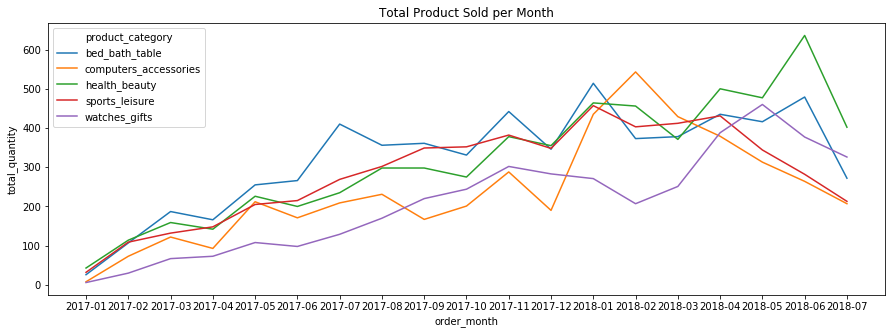

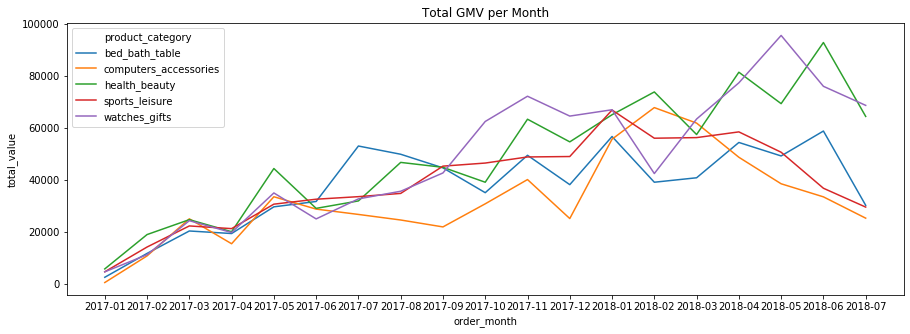

In [84]:
plt.figure(figsize=(15,5))
sns.lineplot(data=result_1, x='order_month', y='total_quantity', hue='product_category')
plt.title('Total Product Sold per Month')

plt.figure(figsize=(15,5))
sns.lineplot(data=result_1, x='order_month', y='total_value', hue='product_category')
plt.title('Total GMV per Month')

plt.show()

#### Conclusion